## Tensorflow/Keras Tutorial

In [2]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

### Sequential networks; layers
- A **feed-forward** or **sequential** neural network is constructed using the `tf.keras.Sequential` class construtor.
It takes a list of **layers** as input. The last layer in the list is the output layer. The rest are hidden layers.
- Layers are defined in the `tf.keras.layers` module.
- In a **dense** layer, a unit is connected with every unit in the previous layer.
- The first layer in a sequential network is responsible for specifying the dimension of the data, i.e., the number of columns of the data matrix, in the `input_dim` keyword argument.
- A sequential model stores its list of layers in its `layers` attribute.

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(3, input_dim=2, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
print(f"Layers: {model.layers}")

# Alternatively
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(3, input_dim=2, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Layers: [<tensorflow.python.keras.layers.core.Dense object at 0x1a2b354a58>, <tensorflow.python.keras.layers.core.Dense object at 0x1a2b354cf8>]
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 3)                 9         
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 4         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


### Weights
- Weights associated to connections between units are initialized randomly. Biases are initialized to zero.
- Inspect the weights using the `get_weights` method.
- It returns a list of length $2L$, $L$ being the number of layers, containing the weight matrices and bias vectors of each layer.
- The weight matrix of dense layer $\ell$ has size $p_{\ell - 1}\times p_\ell$, where $p_\ell$ is the number of units in the $\ell$-th layer.

In [16]:
w1, b1, w2, b2 = model.get_weights()

# model.set_weights([np.zeros_like(w1), b1, np.zeros_like(w2), b2])
# model.set_weights([w1, np.ones_like(b1), w2, np.ones_like(b2)])

print(model.get_weights())
w2

[array([[-0.00515556,  0.8186511 , -0.23828983],
       [-0.5057989 , -0.7630539 ,  0.18627644]], dtype=float32), array([0., 0., 0.], dtype=float32), array([[ 0.97376835],
       [ 1.2173446 ],
       [-0.31684196]], dtype=float32), array([0.], dtype=float32)]


array([[ 0.97376835],
       [ 1.2173446 ],
       [-0.31684196]], dtype=float32)

### Forward propagation; prediction
- If $W^{[\ell]}$, $b^{[\ell]}$, and $A_\ell$ are the weight matrix, and bias vector and activation function of layer $\ell$ and $a^{[\ell]}$ and $a^{[\ell-1]}$ is the vector of activations of layers $\ell$ and $\ell - 1$, then $$a^{[\ell]} = A_\ell(a^{[\ell - 1]}W^{[\ell]} + b^{[\ell]}).$$
- We define the activations of the input layer to be the input values, themselves.
- To propagate data through a network, use the `predict` method.
- To check our understanding, we can do this manually.

In [22]:
X = np.random.normal(size=(10, 2))
print(model.predict(X))

relu = tf.keras.activations.relu
sigmoid = tf.keras.activations.sigmoid

w1, b1, w2, b2 = model.get_weights()
a0 = X
a1 = relu(a0.dot(w1) + b1).numpy()
a2 = sigmoid(a1.dot(w2) + b2).numpy()

print(a2)
# print(a1)

[[0.5299989 ]
 [0.5       ]
 [0.4889929 ]
 [0.62795687]
 [0.4726238 ]
 [0.49364573]
 [0.46744058]
 [0.93751174]
 [0.4778661 ]
 [0.48844033]]
[[0.52999889]
 [0.5       ]
 [0.48899289]
 [0.62795686]
 [0.47262379]
 [0.49364572]
 [0.46744056]
 [0.93751179]
 [0.47786611]
 [0.48844033]]


### Exercise

- Encode this 1-layer neural network with sigmoid activation as a Keras sequential model. Set the weights and bias as indicated.
- Predict the values for $(0, 0)$, $(1, 0)$,  $(0, 1)$, and $(1, 1)$.

<img src="one_and_three_nn.png" height="50%" width="50%" />

In [34]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, input_dim=2, activation="sigmoid"))
model.summary()

my_weights = [np.array([[-20], [-20]]), np.array([10])]
model.set_weights(my_weights)
model.get_weights()
X = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
print(model.predict(X))
print(model.predict_classes(X))

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
[[9.9995458e-01]
 [4.5397872e-05]
 [4.5397872e-05]
 [9.3576236e-14]]
[[1]
 [0]
 [0]
 [0]]


### Exercise

- Encode this 2-layer neural network as a Keras sequential model. Set the weights and bias as indicated.
- Predict the values for $(0, 0)$, $(1, 0)$,  $(0, 1)$, and $(1, 1)$.

<img src="xnor.png" height="50%" width="50%" />

In [40]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(2, input_dim=2, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))
model.summary()

model.get_weights()
w1 = np.array([[20, -20], [20, -20]])
b1 = np.array([-30, 10])
w2 = np.array([[20], [20]])
b2 = np.array([-10])
model.set_weights([w1, b1, w2, b2])

X = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
y_p = model.predict_classes(X)
print(y_p)

model.get_weights()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
[[1]
 [0]
 [0]
 [1]]


[array([[ 20., -20.],
        [ 20., -20.]], dtype=float32),
 array([-30.,  10.], dtype=float32),
 array([[20.],
        [20.]], dtype=float32),
 array([-10.], dtype=float32)]

### Training

- In practice we don't assign weights; the network **learns** the weights from **training data**.
- Given a data point $(\boldsymbol{x}, y)$, can feed $\boldsymbol{x}$ into the network which returns a quantity $\widehat y$.
- Error in approximating of $y$ by $\widehat y$ is encoded in a **loss function** $L(y, \widehat{y})$.
- Which loss function to use is part of the design of your machine learning algorithm. It is not intrinsic to the neural network; you must provide it to the `compile` method.
- By **backpropagating** this error through the network, `tensorflow` systematically adjusts the weights and biases to reduce the error.
Specity the **optimizer**, the numerical algorithm used to adjust the weights and biases, as the `optimizer` argument of the model's `compile` method.
- A training loop can makes multiple passes over the training date. Each pass through an **epoch**. Specify the number of training epochs to the `compile` method as the `epochs` argument.

In [49]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(3, input_dim=2, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

X = np.random.normal(size=(1, 2))
y = np.random.randint(2, size=(1,))
print(X, y, "\n")

y_p = model.predict(X)

print(y_p)
loss_should_be = tf.keras.losses.binary_crossentropy(y, y_p)
print(f"The cross entropy loss should be: {loss_should_be}\n")

h = model.fit(X, y)

[[0.86319168 0.06743475]] [1] 

[[0.5]]
The cross entropy loss should be: [0.69314694]

1/1 [==============================] - 0s 77ms/sample - loss: 0.6931 - accuracy: 0.0000e+00


In [54]:
X = np.random.normal(size=(20, 2))
y = np.random.randint(2, size=(20,))
expected_training_accuracy = np.sum(model.predict_classes(X).reshape(-1) == y)/len(y)
print(f"Expected training accuracy: {expected_training_accuracy}\n")
model.fit(X, y)


Expected training accuracy: 0.35

20/20 [==============================] - 0s 48us/sample - loss: 0.7271 - accuracy: 0.3500


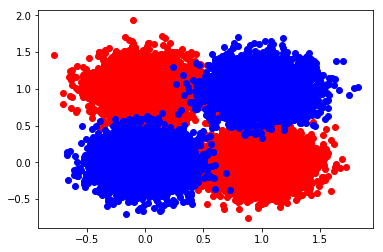

Train on 20000 samples, validate on 1000 samples
Epoch 1/30
20000/20000 [==============================] - 1s 27us/sample - loss: 0.7213 - accuracy: 0.3610 - val_loss: 0.7104 - val_accuracy: 0.3450
Epoch 2/30
20000/20000 [==============================] - 0s 20us/sample - loss: 0.6883 - accuracy: 0.4010 - val_loss: 0.6850 - val_accuracy: 0.4170
Epoch 3/30
20000/20000 [==============================] - 0s 20us/sample - loss: 0.6706 - accuracy: 0.4695 - val_loss: 0.6695 - val_accuracy: 0.4860
Epoch 4/30
20000/20000 [==============================] - 0s 20us/sample - loss: 0.6588 - accuracy: 0.5225 - val_loss: 0.6580 - val_accuracy: 0.5310
Epoch 5/30
20000/20000 [==============================] - 0s 20us/sample - loss: 0.6490 - accuracy: 0.5588 - val_loss: 0.6481 - val_accuracy: 0.5580
Epoch 6/30
20000/20000 [==============================] - 0s 20us/sample - loss: 0.6402 - accuracy: 0.5900 - val_loss: 0.6392 - val_accuracy: 0.5860
Epoch 7/30
20000/20000 [==============================] -

In [71]:
n_train = 10000*2
n_test = 1000
X_train = np.random.randint(2, size=(n_train, 2))
X_test = np.random.randint(2, size=(n_test, 2))
y_train = np.logical_not(np.logical_xor(X_train[:, 0], X_train[:, 1]))*1
y_test = np.logical_not(np.logical_xor(X_test[:, 0], X_test[:, 1]))*1
X_train = X_train + np.random.normal(0, 0.2, size=(n_train, 2))
X_test = X_test + np.random.normal(0, 0.2, size=(n_test, 2))
plt.plot(X_train[y_train == 0, 0], X_train[y_train == 0, 1], 'ro')
plt.plot(X_train[y_train == 1, 0], X_train[y_train == 1, 1], 'bo')
plt.show()

model = tf.keras.Sequential([
    tf.keras.layers.Dense(3, input_dim=2, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30)

In [75]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30)

Train on 20000 samples, validate on 1000 samples
Epoch 1/30
20000/20000 [==============================] - 0s 20us/sample - loss: 0.3224 - accuracy: 0.9624 - val_loss: 0.3214 - val_accuracy: 0.9690
Epoch 2/30
20000/20000 [==============================] - 0s 20us/sample - loss: 0.3168 - accuracy: 0.9630 - val_loss: 0.3159 - val_accuracy: 0.9690
Epoch 3/30
20000/20000 [==============================] - 0s 20us/sample - loss: 0.3113 - accuracy: 0.9635 - val_loss: 0.3105 - val_accuracy: 0.9690
Epoch 4/30
20000/20000 [==============================] - 0s 20us/sample - loss: 0.3059 - accuracy: 0.9639 - val_loss: 0.3051 - val_accuracy: 0.9700
Epoch 5/30
20000/20000 [==============================] - 0s 20us/sample - loss: 0.3005 - accuracy: 0.9641 - val_loss: 0.2998 - val_accuracy: 0.9700
Epoch 6/30
20000/20000 [==============================] - 0s 20us/sample - loss: 0.2952 - accuracy: 0.9642 - val_loss: 0.2944 - val_accuracy: 0.9720
Epoch 7/30
20000/20000 [==============================] -

In [76]:
y_p = model.predict_classes(X_test).reshape(-1)
sum(y_p == y_test)/len(y_p)

0.973

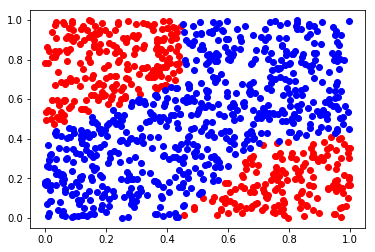

In [77]:
U = np.random.uniform(size=(1000, 2))
v = model.predict_classes(U).reshape(-1)
plt.plot(U[v == 0, 0], U[v == 0, 1], 'ro')
plt.plot(U[v == 1, 0], U[v == 1, 1], 'bo')
plt.show()


### Exercise
Build a network that can recognize this pattern

In [78]:
plt.plot(range(30), h["val_loss"], range(30), h["loss"], range(30),  h["val_accuracy"], range(30), h["accuracy"])
plt.show()

TypeError: 'History' object is not subscriptable

### Exercise

- Construct a sequential neural network that can learn the pattern depicted below.
- Experiment with numbers of layers, numbers of units in each layer, optimizer (`optimizer="rmsprop"`) typically works well), etc.
- Note any interesting misclassification patterns you find. 

<img src="boxed_circle.png" />


In [88]:
# Here's how to generate data like this:
n = 2**14
X = np.random.uniform(size=(n, 2))
y = np.linalg.norm(X - np.array([0.5, 0.5]), axis=1) < 0.4

model = tf.keras.Sequential([
    tf.keras.layers.Dense(5, input_dim=2, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(X, y, validation_split=0.2, epochs=30)


Train on 13107 samples, validate on 3277 samples
Epoch 1/30
13107/13107 [==============================] - 1s 43us/sample - loss: 0.6681 - accuracy: 0.5931 - val_loss: 0.6457 - val_accuracy: 0.6701
Epoch 2/30
13107/13107 [==============================] - ETA: 0s - loss: 0.6235 - accuracy: 0.69 - 0s 27us/sample - loss: 0.6198 - accuracy: 0.7016 - val_loss: 0.5998 - val_accuracy: 0.7183
Epoch 3/30
13107/13107 [==============================] - 0s 25us/sample - loss: 0.5689 - accuracy: 0.7426 - val_loss: 0.5468 - val_accuracy: 0.7583
Epoch 4/30
13107/13107 [==============================] - 0s 26us/sample - loss: 0.5138 - accuracy: 0.7820 - val_loss: 0.4916 - val_accuracy: 0.7943
Epoch 5/30
13107/13107 [==============================] - 0s 26us/sample - loss: 0.4519 - accuracy: 0.8211 - val_loss: 0.4269 - val_accuracy: 0.8364
Epoch 6/30
13107/13107 [==============================] - 0s 26us/sample - loss: 0.3887 - accuracy: 0.8594 - val_loss: 0.3679 - val_accuracy: 0.8551
Epoch 7/30
1310

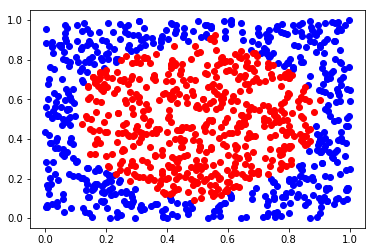

In [90]:
n = 2**10
X = np.random.uniform(size=(n, 2))
# y = np.linalg.norm(X - np.array([0.5, 0.5]), axis=1) < 0.4
y = model.predict_classes(X).reshape(-1)
plt.plot(X[y == 0, 0], X[y == 0, 1], 'bo')
plt.plot(X[y == 1, 0], X[y == 1, 1], 'ro')
plt.show()


In [87]:
X1 = X; y1 = y

In [91]:
model.summary()

Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_76 (Dense)             (None, 5)                 15        
_________________________________________________________________
dense_77 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_78 (Dense)             (None, 1)                 6         
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________
